<h1 align="center">ROS Analysis</h1>
<h3><center><i>Getting Started With Jupyter Notebook</i></center></h3>
<center>
  <img src="https://jupyter.org/assets/nav_logo.svg" alt="Jupyter" height="200" width="320"/>
</center>

# Introduction
[Jupyter Notebook](https://jupyter.org/) is a commonly used open-source 
tool in data science. It allows for organzing and sharing data processing 
and analysis code in a readable notebook style format. There are many 
[great examples](https://github.com/jupyter/jupyter/wiki/A-gallery-of-interesting-Jupyter-Notebooks) 
of Jupyter Notebook on the web. This blog post will provide an example of 
how this powerful tool can be used to analyze ROS data. Hopefully it 
will serve as a complete example of how to create your own notebook to 
analyze your robot's data. 

## Getting Some Sample Robot Data
Before we begin our analysis of ROS data with Jupyter, we need some robot data. 
To get this data, we will use the simulator for the open-source robot, 
Bobble-Bot. This project contains a high fidelity simulation of a two 
wheeled self-balancing robot. The simulator has been validated against 
test runs of the real robot created by the engineers at [SOE](https://so.engineering). 
For more information, see the project's
[GitHub page](https://github.com/super-owesome/bobble_controllers).
<center>
  <img src="https://raw.githubusercontent.com/super-owesome/bobble_controllers/master/imgs/BobbleBotGazebo.png" alt="Bobble-Bot Sim" height="400" width="640"/>
</center>

If you'd like to jump ahead to the Jupyter specific steps, you can take a 
shortcut and download the ROS bag data here [TBD](https://google.com).

## Building and running the simulation
The Bobble-Bot simulator requires ROS and Gazebo. Follow the instructions 
[here](http://wiki.ros.org/melodic/Installation/Ubuntu)
and install ROS Melodic Desktop. Other recent versions of ROS should also work, 
but they are not officially  supported at this time. The simulator also makes 
use of the [Hector Gazebo](http://wiki.ros.org/hector_gazebo_plugins) 
plugins. Those can be installed using the command below.

```sh
apt-get install ros-melodic-hector-gazebo-plugins
```

Before starting the build process, make sure your ROS environment is active.

```sh
source /opt/ros/melodic/setup.bash
```

Get the simulation code and build it using catkin.

```sh
mkdir -p ~/bobble_workspace/src
cd ~/bobble_workspace
catkin_init_workspace
git clone https://github.com/super-owesome/bobble_controllers.git
git clone https://github.com/super-owesome/bobble_description.git
catkin_make
source install/setup.bash
```

The Bobble-Bot controller package comes with a set of launch files that can 
be used to generate data from different runs of the simulation. As an 
example, the apply_impulse_force.launch file can be used to run the Bobble-Bot 
simulation and apply an impulse force in the X direction. This launch file accepts 
a few launch parameters. 
Most notably, the X component of the impulse force, and a flag to enable/disable 
the 3D graphics. 

```sh
roslaunch bobble_controllers apply_impulse_force.launch impulse_force:=-1000 gui:=true
```

The launch file also instructs the simulation to log simulation data during the run.
The data is placed in the following location by default:

```sh
$ ls ~/.ros | grep impulse_data
impulse_data.bag
```

## Generating some more data
The bobble_controllers package comes with a set of automated tests that can be used 
to quickly and easily generate data from four different test runs of the 
Bobble-Bot balance controller. These tests can be run using the following 
commands.

```sh
cd ~/bobble_workspace
catkin run_tests -j1
```

These tests will take a few minutes to run. A lot is happening behind the scenes 
and your data is being generated. Now would be a good time to grab a cup 
of coffee. Once the tests have completed you can get a summary of the results using the 
commands below:

``` shell
catkin_test_results --verbose .
Summary: 18 tests, 0 errors, 0 failures, 0 skipped
```

If all went well, your tests will have all passed. If you encounter a failure, 
post a comment below. The tests generated simulation results from four different 
runs and recorded the data from each into ROS bag files. The table below briefly 
summarizes each test that was performed.


| Test Name           | Description                                  | Source Code    |
| ------------------- | -------------------------------------------- | -------------- |
| No Balance          | Bobble-Bot uncontrolled                      | [TBD](https://github.com/super-owesome/bobble_controllers) |
| Impulse force       | Balance control active, impulse applied.     | [TBD](https://github.com/super-owesome/bobble_controllers) |
| Balance Control     | Balance control active, drive around.        | [TBD](https://github.com/super-owesome/bobble_controllers) |
| Drive square        | Balance control active, drive in square.     | [TBD](https://github.com/super-owesome/bobble_controllers) |


The data can be found in the following directory:

```sh
ls src/bobble_controllers/test/data/
balance.bag  drive_square_js_response.bag  impulse_force.bag  no_balance.bag
balance.csv  drive_square_js_response.csv  impulse_force.csv  no_balance.csv
```

If anything went wrong, you can simply download the data [here](https://google.com).
Now that we have our data, we can move on to setting up Jupyter Notebook to 
begin the analysis.

## Setting up analysis environment
TODO

# Analyzing ROS Data With Jupyter

## Loading Bobble-Bot Simulation Data
Using the gazebo-ros packages, one can log data as the simulator runs each test and store it in a ROS bag format. 
The simulation data can then be analyzed with Python using [Pandas](https://pandas.pydata.org/). This article discusses 
how to [load ROS bag files into Pandas](https://nimbus.unl.edu/2014/11/using-rosbag_pandas-to-analyze-rosbag-files/). 
The file nb_env.py is used to load in the data from the tests into a Python dictionary of Pandas 
[DataFrames](https://pandas.pydata.org/pandas-docs/version/0.21/generated/pandas.DataFrame.html).
Consult nb_env.py and parsing.py to see exactly how this is done.

In [1]:
# Load anaylsis environment file. This file defines data directories
# and imports all needed Python packages for this notebook.
exec(open("nb_env.py").read())
runs = ['no_balance', 'balance', 'impulse_force', 'drive_square_js_response']
# Print out the df dictionary keys (the test run names)
df.keys()

Reading all bag files in directory : 
/home/mike/BobbleBotSim/src/bobble_controllers/analysis/notebooks/RosJupyterAnalysis/data
Successfully loaded runs : 


['impulse_force', 'drive_square_js_response', 'balance', 'no_balance']

## Loading the Plot Configuration
YAML is used to define a default matplotlib configuration for each plot used in this file. This is done to set a title, line styles, axis labels, 
the legend, and other relevant configuration parameters for each plot. Consult plots.yaml to see the full default configuration used by this 
report. A summary of the default tilt control plot configuration is given below as an example.
```yml
tilt_control:
  title : 'Tilt Control'
  desired_y_var: 'bobble_bobble_balance_controller_bb_controller_status__DesiredTilt'
  actual_y_var: 'bobble_bobble_balance_controller_bb_controller_status__Tilt'
  runs : ['balance']
  x_label: 'Time (s)'
  y_label: 'Tilt (deg)'
  colors : ['red', 'blue']
  legend:
     desired:
       color: 'red'
       linestyle: '-'
     actual:
       color: 'blue'
       linestyle: '-'
  xlim: [0.0, 10.0]
```
The code below loads the configuration objects into a plot config Python dictionary, pc. Any of these objects can be 
copied, or the default values can be overwritten before creating the final plot. Some examples of this will be shown in 
later sections of this report.

In [2]:
# Set paths to relevant data directories and config files
plot_config_file = os.path.abspath(os.path.join(os.getcwd(),'plots.yaml'))
# Load configs and data
pc = parse_config_file(plot_config_file)

Loading configs from file : /home/mike/BobbleBotSim/src/bobble_controllers/analysis/notebooks/RosJupyterAnalysis/plots.yaml


## Pre-Processing
This section applies any and all pre-processing steps needed on the data set. Examples include trimming the data, removing bias, filtering, and applying transforms.
For this report, we compute some additional data using a differential drive robot model.

### Compute Auxiliary Data
Currently, Bobble-Bot does not track its x,y world position internally because it is not needed by the balance controller. For this analysis, we 
would like to look at some commanded trajectories in world coordinates. In order to do this, we use a kinematic model for a differential drive 
robot to compute translational and rotational state from the raw simulation data. The model to be used is described in the graphic below.
<center>
  <img src="https://raw.githubusercontent.com/super-owesome/bobble_controllers/master/imgs/DifferentialDrive.png" alt="Differential Drive Model" height="400" width="375"/>
</center>
The Python code below defines a function that uses this model in order to compute x, y position and velocity in world co-ordinates for each test run.

In [3]:
import math

def compute_auxiliary_terms(df, fwd_vel_scale=1.0, turn_rate_scale=1.0):
    turn_rate = turn_rate_scale*df['bobble_bobble_balance_controller_bb_controller_status__TurnRate']
    heading = scipy.integrate.cumtrapz(y=turn_rate.values, x=turn_rate.index)
    heading = np.append(heading, heading[-1])
    fwd_vel = fwd_vel_scale*df['bobble_bobble_balance_controller_bb_controller_status__ForwardVelocity']
    x_vel = fwd_vel * np.cos(heading*np.pi/180.0)
    y_vel = fwd_vel * np.sin(heading*np.pi/180.0)
    x_pos = scipy.integrate.cumtrapz(y=x_vel.values, x=x_vel.index)
    x_pos = np.append(x_pos, x_pos[-1])
    y_pos = scipy.integrate.cumtrapz(y=y_vel.values, x=y_vel.index)
    y_pos = np.append(y_pos, y_pos[-1])
    desired_fwd_vel = fwd_vel_scale*df['bobble_bobble_balance_controller_bb_controller_status__DesiredVelocity']
    desired_turn_rate = turn_rate_scale*df['bobble_bobble_balance_controller_bb_controller_status__DesiredTurnRate']
    desired_heading = scipy.integrate.cumtrapz(y=desired_turn_rate.values, x=desired_turn_rate.index)
    desired_heading = np.append(desired_heading, desired_heading[-1])
    desired_x_vel = desired_fwd_vel * np.cos(desired_heading*np.pi/180.0)
    desired_y_vel = desired_fwd_vel * np.sin(desired_heading*np.pi/180.0)
    desired_x_pos = scipy.integrate.cumtrapz(y=desired_x_vel.values, x=desired_x_vel.index)
    desired_x_pos = np.append(desired_x_pos, desired_x_pos[-1])
    desired_y_pos = scipy.integrate.cumtrapz(y=desired_y_vel.values, x=desired_y_vel.index)
    desired_y_pos = np.append(desired_y_pos, desired_y_pos[-1])
    df['bobble_bobble_balance_controller_bb_controller_status__Heading'] = heading
    df['DerivedHeading'] = heading
    df['DesiredHeading'] = desired_heading
    df['DesiredXPos'] = desired_x_pos
    df['DesiredYPos'] = desired_y_pos
    df['DerivedXPos'] = x_pos
    df['DerivedYPos'] = y_pos

for run in runs:
    compute_auxiliary_terms(df[run])

With that, we now have everything we need to create some useful plots summarizing the control
performance for each test run. Before creating the plots, let's show some examples of basic 
DataFrame manipulations using features within the Pandas library. Consult the Pandas documentation 
to learn more.

### Print sim data in tabular form
We can print the first five rows of the data in a nice tabular form like so.

In [4]:
n_rows = 5
df['no_balance'].head(n_rows)

,bobble_bobble_balance_controller_bb_controller_status__ControlMode,bobble_bobble_balance_controller_bb_controller_status__DesiredTilt,bobble_bobble_balance_controller_bb_controller_status__DesiredTurnRate,bobble_bobble_balance_controller_bb_controller_status__DesiredVelocity,bobble_bobble_balance_controller_bb_controller_status__ForwardVelocity,bobble_bobble_balance_controller_bb_controller_status__Heading,bobble_bobble_balance_controller_bb_controller_status__HeadingEffort,bobble_bobble_balance_controller_bb_controller_status__LeftMotorEffortCmd,bobble_bobble_balance_controller_bb_controller_status__LeftMotorPosition,bobble_bobble_balance_controller_bb_controller_status__LeftMotorVelocity,...,bobble_bobble_balance_controller_bb_controller_status__TiltEffort,bobble_bobble_balance_controller_bb_controller_status__TiltRate,bobble_bobble_balance_controller_bb_controller_status__TurnRate,time,DerivedHeading,DesiredHeading,DesiredXPos,DesiredYPos,DerivedXPos,DerivedYPos
time,,,,,,,,,,,,,,,,,,,,,
0.000,0.0,0.0,0.0,0.0,-0.000003,-0.002175,0.0,0.0,-0.002021,-0.002918,...,0.0,-0.802516,0.299757,0.000,-0.002175,0.0,0.0,0.0,-1.273438e-08,1.030465e-12
0.005,0.0,0.0,0.0,0.0,-0.000003,-0.007098,0.0,0.0,-0.002033,-0.002918,...,0.0,0.920527,-1.169851,0.005,-0.007098,0.0,0.0,0.0,-2.546875e-08,3.042834e-12
0.010,0.0,0.0,0.0,0.0,-0.000003,-0.011011,0.0,0.0,-0.002044,-0.002918,...,0.0,-0.648496,-0.799058,0.010,-0.011011,0.0,0.0,0.0,-3.820312e-08,6.088729e-12
0.015,0.0,0.0,0.0,0.0,-0.000003,-0.016398,0.0,0.0,-0.002056,-0.002918,...,0.0,-0.684104,-0.766341,0.015,-0.016398,0.0,0.0,0.0,-5.274157e-08,1.104558e-11
0.020,0.0,0.0,0.0,0.0,-0.000003,-0.021979,0.0,0.0,-0.002067,-0.003891,...,0.0,0.211072,-1.388374,0.020,-0.021979,0.0,0.0,0.0,-6.935470e-08,1.826835e-11


### Search for a column
Here's how to search for a column(s) in a DataFrame.

In [5]:
search_string = 'Vel'
found_data = df['no_balance'].filter(regex=search_string)
found_data.head()

,bobble_bobble_balance_controller_bb_controller_status__DesiredVelocity,bobble_bobble_balance_controller_bb_controller_status__ForwardVelocity,bobble_bobble_balance_controller_bb_controller_status__LeftMotorVelocity,bobble_bobble_balance_controller_bb_controller_status__RightMotorVelocity
time,,,,
0.000,0.0,-0.000003,-0.002918,-0.002919
0.005,0.0,-0.000003,-0.002918,-0.002919
0.010,0.0,-0.000003,-0.002918,-0.002919
0.015,0.0,-0.000003,-0.002918,-0.002919
0.020,0.0,-0.000003,-0.003891,-0.003891


Many more data processing and manipulation functions are possible. Consult the 
[Pandas documentation](https://pandas.pydata.org/pandas-docs/version/0.21/generated/pandas.DataFrame.html) 
for more information.

# The Results
That's enough prep work. Now let's look at the results

## Balance vs No Balance
To start, we can create a plot of the tilt angle for the balanced versus un-balanced test case.

### Tilt Plot
To make this plot we start with the 'measured_tilt' default plot configuration. The lines of code below
show an example of making a copy of this configuration object and specifying some user defined overrides.
Once the plot configuration object is defined (cfg), we can call the make_static_plot function
to produce the plot. The make_static_plot function takes the data frame, a plot config dictionary object, 
and a string for the plot name.

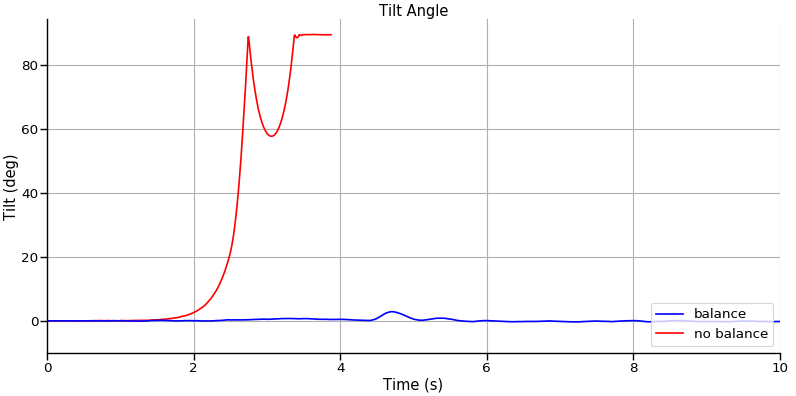

In [6]:
%matplotlib inline
cfg = pc['measured_tilt'].copy()
cfg['runs'] = ['no_balance', 'balance']
cfg['colors'] = ['red', 'blue']
cfg['linestyles'] = ['-', '-']
cfg['legend'] = {
    'no balance': {
        'color': 'red',
        'linestyle': '-'
    },
    'balance': {
        'color': 'blue',
        'linestyle': '-'
    },
}
cfg['xlim'] = [0.0, 10.0]
make_static_plot(df, cfg, 'TiltVsTime')

### Velocity Plot
Following the tilt plot example, we can also make a comparison plot of Bobble-Bot's velocity during the no balance and balance 
simulation runs.

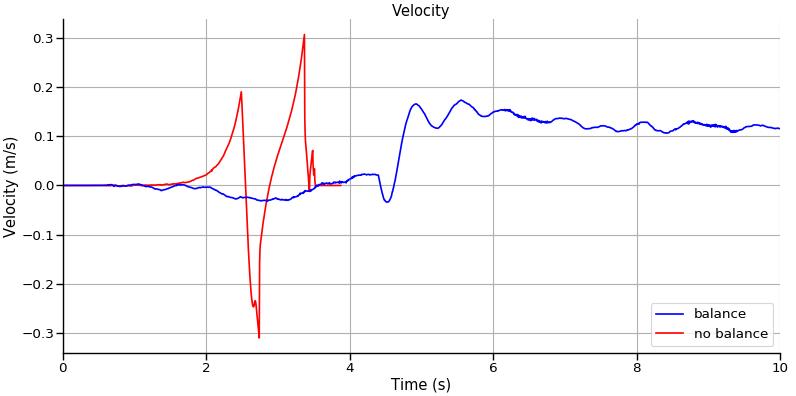

In [7]:
%matplotlib inline
cfg = pc['velocity'].copy()
cfg['runs'] = ['no_balance', 'balance']
cfg['colors'] = ['red', 'blue']
cfg['linestyles'] = ['-', '-']
cfg['legend'] = {
    'no balance': {
        'color': 'red',
        'linestyle': '-'
    },
    'balance': {
        'color': 'blue',
        'linestyle': '-'
    },
}
cfg['xlim'] = [0.0, 10.0]
make_static_plot(df, cfg, 'VelocityVsTime')

These tilt and velocity comparisons for the no balance and balance runs show a simple example 
analysis that captures the performance that we should expect once balance mode is activated 
on the robot.

## Impulse Force Test
Another useful test for evaluating the balance controller is to look at how it performs under an 
applied impulse force. To do that we can look at the tilt and velocity control performance 
after the impulse is applied. Let's start with looking at the velocity controller

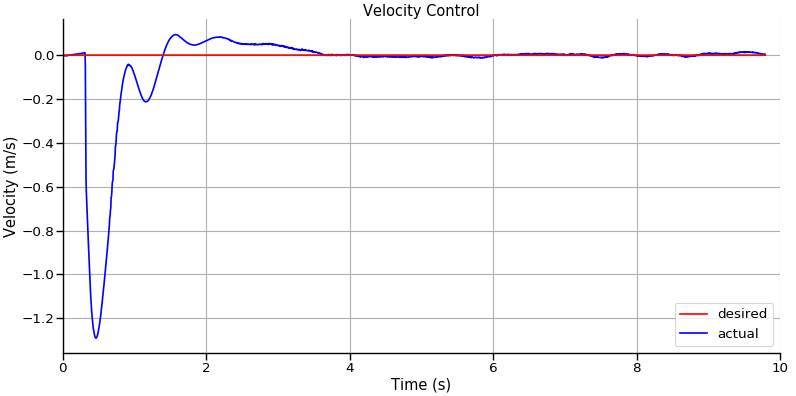

In [8]:
%matplotlib inline
cfg = pc['velocity_control'].copy()
cfg['runs'] = ['impulse_force']
cfg['xlim'] = [0, 10]
make_static_plot(df, cfg, 'ImpulseVelocityControl', plot_func=desired_vs_actual_for_runs)

This plot shows what you would expect for an impulse force applied in the -X direction. During this 
test the robot is in the balance mode. In this mode, the robot is trying to hold zero velocity. The 
applied impulse cause the robot to quickly accelerate in the -X direction. The job of the velocity 
controller is to reject this impulse by controlling the velocity back to zero. The plot above shows 
that the velocity controller is able to achieve its goal. In order to reject the -X disturbance force, 
the velocity controller modulates the desired tilt. In response to the -X impulse, the velocity controller 
commands the robot to tilt forward. The tilt controller then commands torque to each motor to achieve 
this tilt angle. This tilting motion serves to simultaneously control the velocity and reject the 
disturbance. Let's look at the tilt response to see this in action.

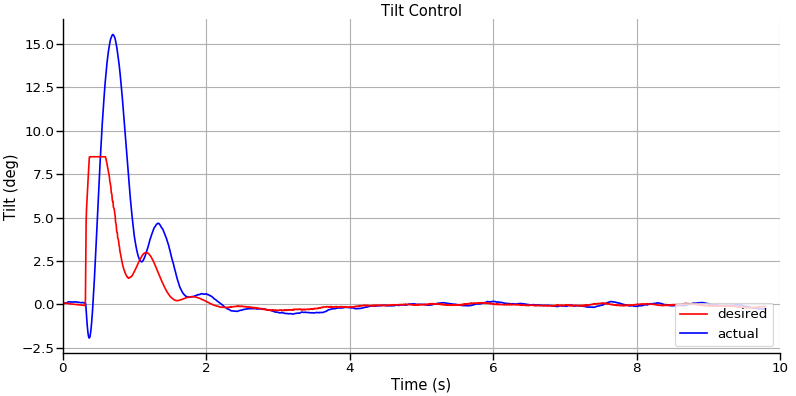

In [9]:
%matplotlib inline
cfg = pc['tilt_control'].copy()
cfg['runs'] = ['impulse_force']
cfg['xlim'] = [0, 10]
make_static_plot(df, cfg, 'ImpulseTiltControl', plot_func=desired_vs_actual_for_runs)

Here we see the veloicty controller commanding a positive tilt to the tilt controller (red line) in response 
to the -X impulse. In response to this forward tilt, the tilt controller successfully tilts the robot forward. 
This tilting motion causes the robot to begin to accelerate back in the +X direction. The velocity controller 
detects this change in velocity and begins to ramp down the forward tilt command until it is zero. This tilting 
motion brings the robot back to its balanced and rested state.

## Analyzing the Balance Test
This section will look at the data from the balance test in more detail. This test lasts about thirty seconds. 
During the test, the robot is commanded to drive forward and then backward. After those commands are executed, 
the robot is commanded to turn right and then back to the left. Let's make some plots to confirm the robot 
performs as expected.

### Commands vs Response

Using the velocity control plot as our template, we make some slight modifications to use the balance 
run and limit the x axis to between 0 and 35 seconds. The plot below should show the velocity being 
commanded to 0.1 m/s, -0.1 m/s, and back to rest. We expect the robot to respond to these commands 
appropriately with some tolerance for noise and error in the state.

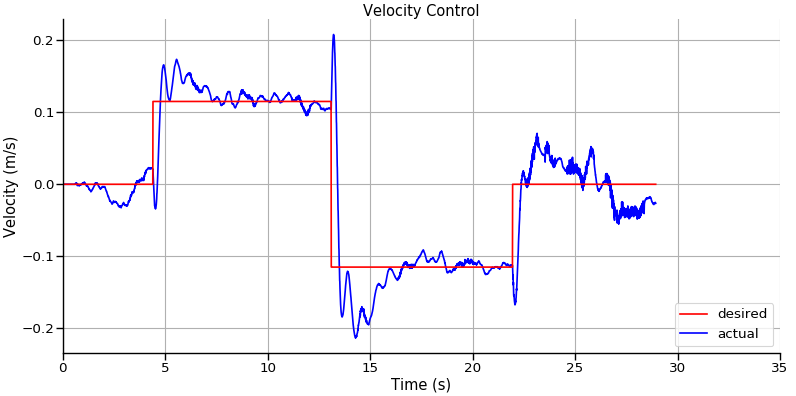

In [10]:
%matplotlib inline
cfg = pc['velocity_control'].copy()
cfg['runs'] = ['balance']
cfg['xlim'] = [0, 35]
make_static_plot(df, cfg, 'VelocityControl', plot_func=desired_vs_actual_for_runs)

In order to drive forward and backward, Bobble-Bot's velocity controller commands a 
positive and then negative tilt to the tilt controller. The effort sent to each motor 
in order to track this tilt command causes the robot to drive forward and then backward. 
We can confirm this behavior by analyzing the tilt controller performance.

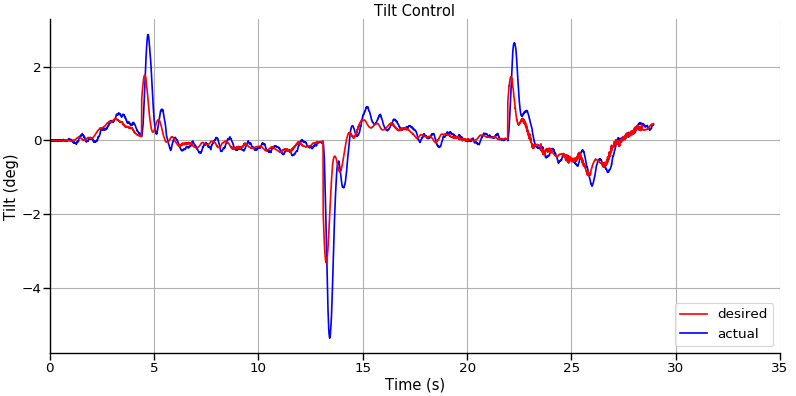

In [11]:
%matplotlib inline
cfg = pc['tilt_control'].copy()
cfg['runs'] = ['balance']
cfg['xlim'] = [0, 35]
make_static_plot(df, cfg, 'TiltControl', plot_func=desired_vs_actual_for_runs)

The plots above confirm the velocity and tilt control performance during the balance test.
Let's now look at the turning commands that were sent during the test.

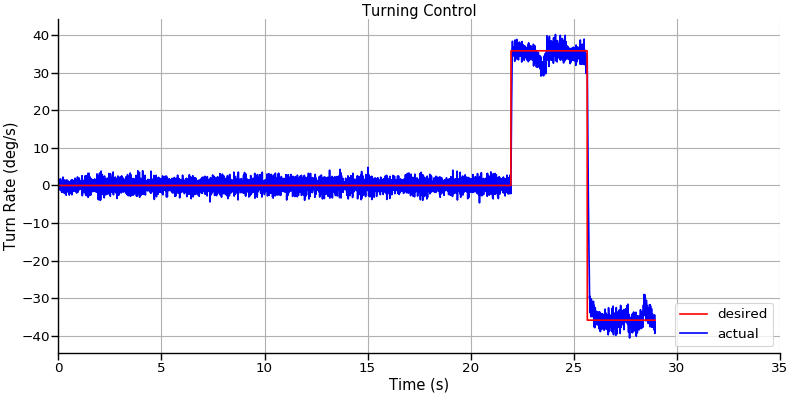

In [12]:
%matplotlib inline
cfg = pc['turning_control'].copy()
cfg['runs'] = ['balance']
cfg['xlim'] = [0, 35]
make_static_plot(df, cfg, 'TurningControl', plot_func=desired_vs_actual_for_runs)

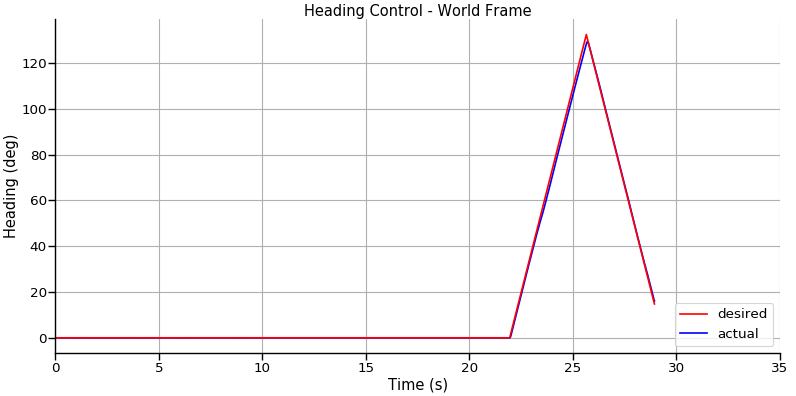

In [13]:
%matplotlib inline
cfg = pc['heading_control'].copy()
cfg['runs'] = ['balance']
cfg['xlim'] = [0, 35]
make_static_plot(df, cfg, 'HeadingControl', plot_func=desired_vs_actual_for_runs)

This concludes our analysis of the balance test. The last test to look at is the drive square test. 
This is done in the next section.

## Analyzing the Drive Square Test
Last on our list of tests is the drive square test. This test is performed by issuing a canned 
set of joystick commands to drive Bobble-Bot in a square. These commands were generated by 
manually driving the robot during a simulation run and logging the joystick command data 
using [rosbag record](http://wiki.ros.org/rosbag/Tutorials/Recording%20and%20playing%20back%20data).
The previous sections have served to validate the velocity, tilt, and turning controller. This 
final plot will show all of these controllers working together to track a commanded trajectory. 
The plot below shows the commanded position in X,Y world coordinates versus the actual X,Y 
position.

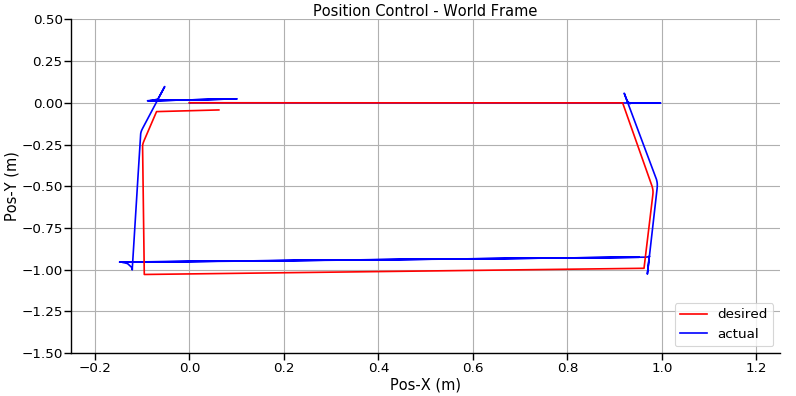

In [14]:
%matplotlib inline
cfg = pc['position_control'].copy()
cfg['runs'] = ['drive_square_js_response']
cfg['xlim'] = [-0.25, 1.25]
cfg['ylim'] = [-1.5, 0.5]
make_static_plot(df, cfg, 'PositionControl', plot_func=desired_vs_actual_for_runs)

# Conclusion
Hopefully this post has provided a good introduction to using Jupyter Notebook 
for ROS robots. Keep in mind, Jupyter is not limited to ROS applications. It 
can be used in a wide variety of analysis and data science applications. Jupyter 
notebooks give others a chance to reproduce your results. They are meant 
to be shared with others so that they can interact with your work and check or 
extend your results. In that spirit, you can find the Jupyter Notebook that 
was used to create this blog post [here](https://github.com/super-owesome/bobble_controllers).

TODO

Link to Bobble-Bot source code. Link to SOE.

### Contact
Mike Moore

mike.moore@so.engineering
